
<h2 style="text-align: center;"><strong> PROYECTO 1 - BICICLETAS COMPARTIDAS</strong></h2>



<style>
  .image {
            overflow: hidden;
            width: 100%;
            border-radius: 20px;
            object-fit: cover;
        }
  .container {
            width: 100%;
            height: 450px;
        }
 
</style>
<div class="container">
    <img src= "img\bicycle.png" class="image"/>
</div>

<div style="text-align: center;">
  Analítica Computacional para la Toma de Decisiones IIND-4130 <br>
  Universidad de los Andes &copy; 2024 <br>
  5 de septiembre de 2024 <br><br>
  <strong>GRUPO :</strong> <br>
  Laura Calderón 202122045 <br>
  Daniela Espinosa 202022615 <br>
  Camilo Duque 202024289 <br>
</div>


### **Tarea 2 - Limpieza y alistamiento de datos**

#### Carga de datos

In [119]:
import pandas as pd
df = pd.read_csv('SeoulBikeData_utf8.csv')
df.shape

(8760, 14)

#### Perfilamiento de los Datos


Información del dataset:

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

Como podemos ver, el dataframe no tiene valores nulos.

Análisis de duplicados:

In [121]:
duplicates = df.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicates}")


Número de registros duplicados: 0


El dataframe tiene duplicados.

Valores únicos por columna:


In [122]:
levels = df.apply(pd.Series.unique)
num_levels = df.apply(pd.Series.nunique)
print("Valores unicos por columna:")
print(levels)
print("\nNúmero unicos por columna:")
print(num_levels)

Valores unicos por columna:
Date                        [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented Bike Count           [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature(C)              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity(%)                 [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed (m/s)            [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility (10m)            [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature(C)    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation (MJ/m2)     [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall(mm)                [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall (cm)               [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                      [Winter, Spring, Summer, Autumn]
Holiday                             

La columna Seasons tiene cuatro ategorías: [Winter, Spring, Summer, Autumn]. Mientras que las columnas Holiday y Functioning Day son categóricas binarias, con valores [No Holiday, Holiday] y [Yes, No] respectivamente.

#### Limpieza de datos

In [123]:
data = df.copy()

Manejo de las variables categóricas:

In [124]:
# Conversión de columnas categóricas binarias
data['Functioning Day'] = data['Functioning Day'].map({'No': 0, 'Yes': 1})
data['Holiday'] = data['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Conversión de columnas con más categorías
data = pd.get_dummies(data, columns=['Seasons'], drop_first=True)
data['Seasons_Spring'] = data['Seasons_Spring'].astype(int)
data['Seasons_Summer'] = data['Seasons_Summer'].astype(int)
data['Seasons_Winter'] = data['Seasons_Winter'].astype(int)

print('New Number of Features: %d'%(data.shape[1]))
data.head()

New Number of Features: 16


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,1


Manejo de las fechas en la columna Date:

In [125]:
# Convertir a formato datetime
data['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Convertir las fechas a su representación ordinal
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

fecha_minima = data['Date'].min().toordinal()
fecha_maxima = data['Date'].max().toordinal()

# Escalar las fechas entre 0 y 1
data['Date_scaled'] = (data['Date_ordinal'] - fecha_minima) / (fecha_maxima - fecha_minima)

# Borrar las columnas Date y Date_ordinal
data = data.drop(columns = ['Date', 'Date_ordinal'])

data

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Date_scaled
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,1,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,1,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,1,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,1,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,0,0,1.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,0,0,1.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,0,0,1.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,0,0,1.0


### **Tarea 3 - Exploración de datos**


Estadísticas descriptivas:

In [32]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#### Exploratory Data Analysis (EDA)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos filtrados - solo valores numericos
df2 = df.select_dtypes(include=["int","float"])

# Funcion creada para crear matriz de graficas
def matriz_graficas(df: pd.DataFrame, y: str, r: int, c: int, 
                    tipo={"histograma","dispersion","caja","violin"}, 
                    titulo= {"histograma","dispersion","caja","violin"},
                    color = "#0e3a99"):
  i=0
  j=0
  fig, axs = plt.subplots(r, c, figsize=(20,20))
  for col in df.columns:
    if j > c-1:
      i += 1
      j = 0
      X = df[col]
      if tipo == "histograma":
        axs[i,j].hist(x = X, color= color, bins=round((X.shape[0])**(1/2)), range=(X.min(), X.max()))
        axs[i,j].set_ylabel('Frecuencia')
      elif tipo=="dispersion":
        axs[i,j].scatter(x = df[col], y = df[y], color= color)
        axs[i,j].set_ylabel(y.name)
      elif tipo=="caja":
        axs[i,j].boxplot(x = X, patch_artist=True, boxprops = dict(facecolor = "#0e3a99"), medianprops = dict(color = "#000000", linewidth = 1.5))
        axs[i,j].set_ylabel('Valores')
      elif tipo=="violin":
        violin = axs[i,j].violinplot(dataset = X, vert=False)
        for pc in violin["bodies"]:
          pc.set_facecolor(color)
        violin["cmins"].set_edgecolor(color)
        violin["cmaxes"].set_edgecolor(color)
        axs[i,j].set_ylabel('Valores')
      elif tipo=="reg":
        sns.regplot(ax= axs[i,j],data=df, x=X, y=df[y], color = color, scatter_kws={'alpha':0.1, 'color':"#3359ab"})
      axs[i,j].set_title(f'{titulo}: {X.name}')
      axs[i,j].set_xlabel(X.name)
      j+=1
    else:
      X = df[col]
      if tipo == "histograma":
        axs[i,j].hist(x = X, color= color, bins=round((X.shape[0])**(1/2)), range=(X.min(), X.max()))
        axs[i,j].set_ylabel('Frecuencia')
      elif tipo=="dispersion":
        axs[i,j].scatter(x = df[col], y = df[y], color= color)
        axs[i,j].set_ylabel(y.name)
      elif tipo=="caja":
        axs[i,j].boxplot(x = X, patch_artist=True, boxprops = dict(facecolor = "#0e3a99"), medianprops = dict(color = "#000000", linewidth = 1.5))
        axs[i,j].set_ylabel('Valores')
      elif tipo=="violin":
        violin = axs[i,j].violinplot(dataset = X, vert=False)
        for pc in violin["bodies"]:
          pc.set_facecolor(color)
        violin["cmins"].set_edgecolor(color)
        violin["cmaxes"].set_edgecolor(color)
        axs[i,j].set_ylabel('Valores')
      elif tipo=="reg":
        sns.regplot(ax= axs[i,j],data=df, x=X, y=df[y], color = color, scatter_kws={'alpha':0.1, 'color':"#3359ab"})
      axs[i,j].set_title(f'{titulo}: {X.name}')
      axs[i,j].set_xlabel(X.name)
      j+=1
  fig.suptitle(f'Matriz de {titulo}', fontsize=16, weight="bold", y=1)
  fig.tight_layout()
  return None


Matriz de Histogramas

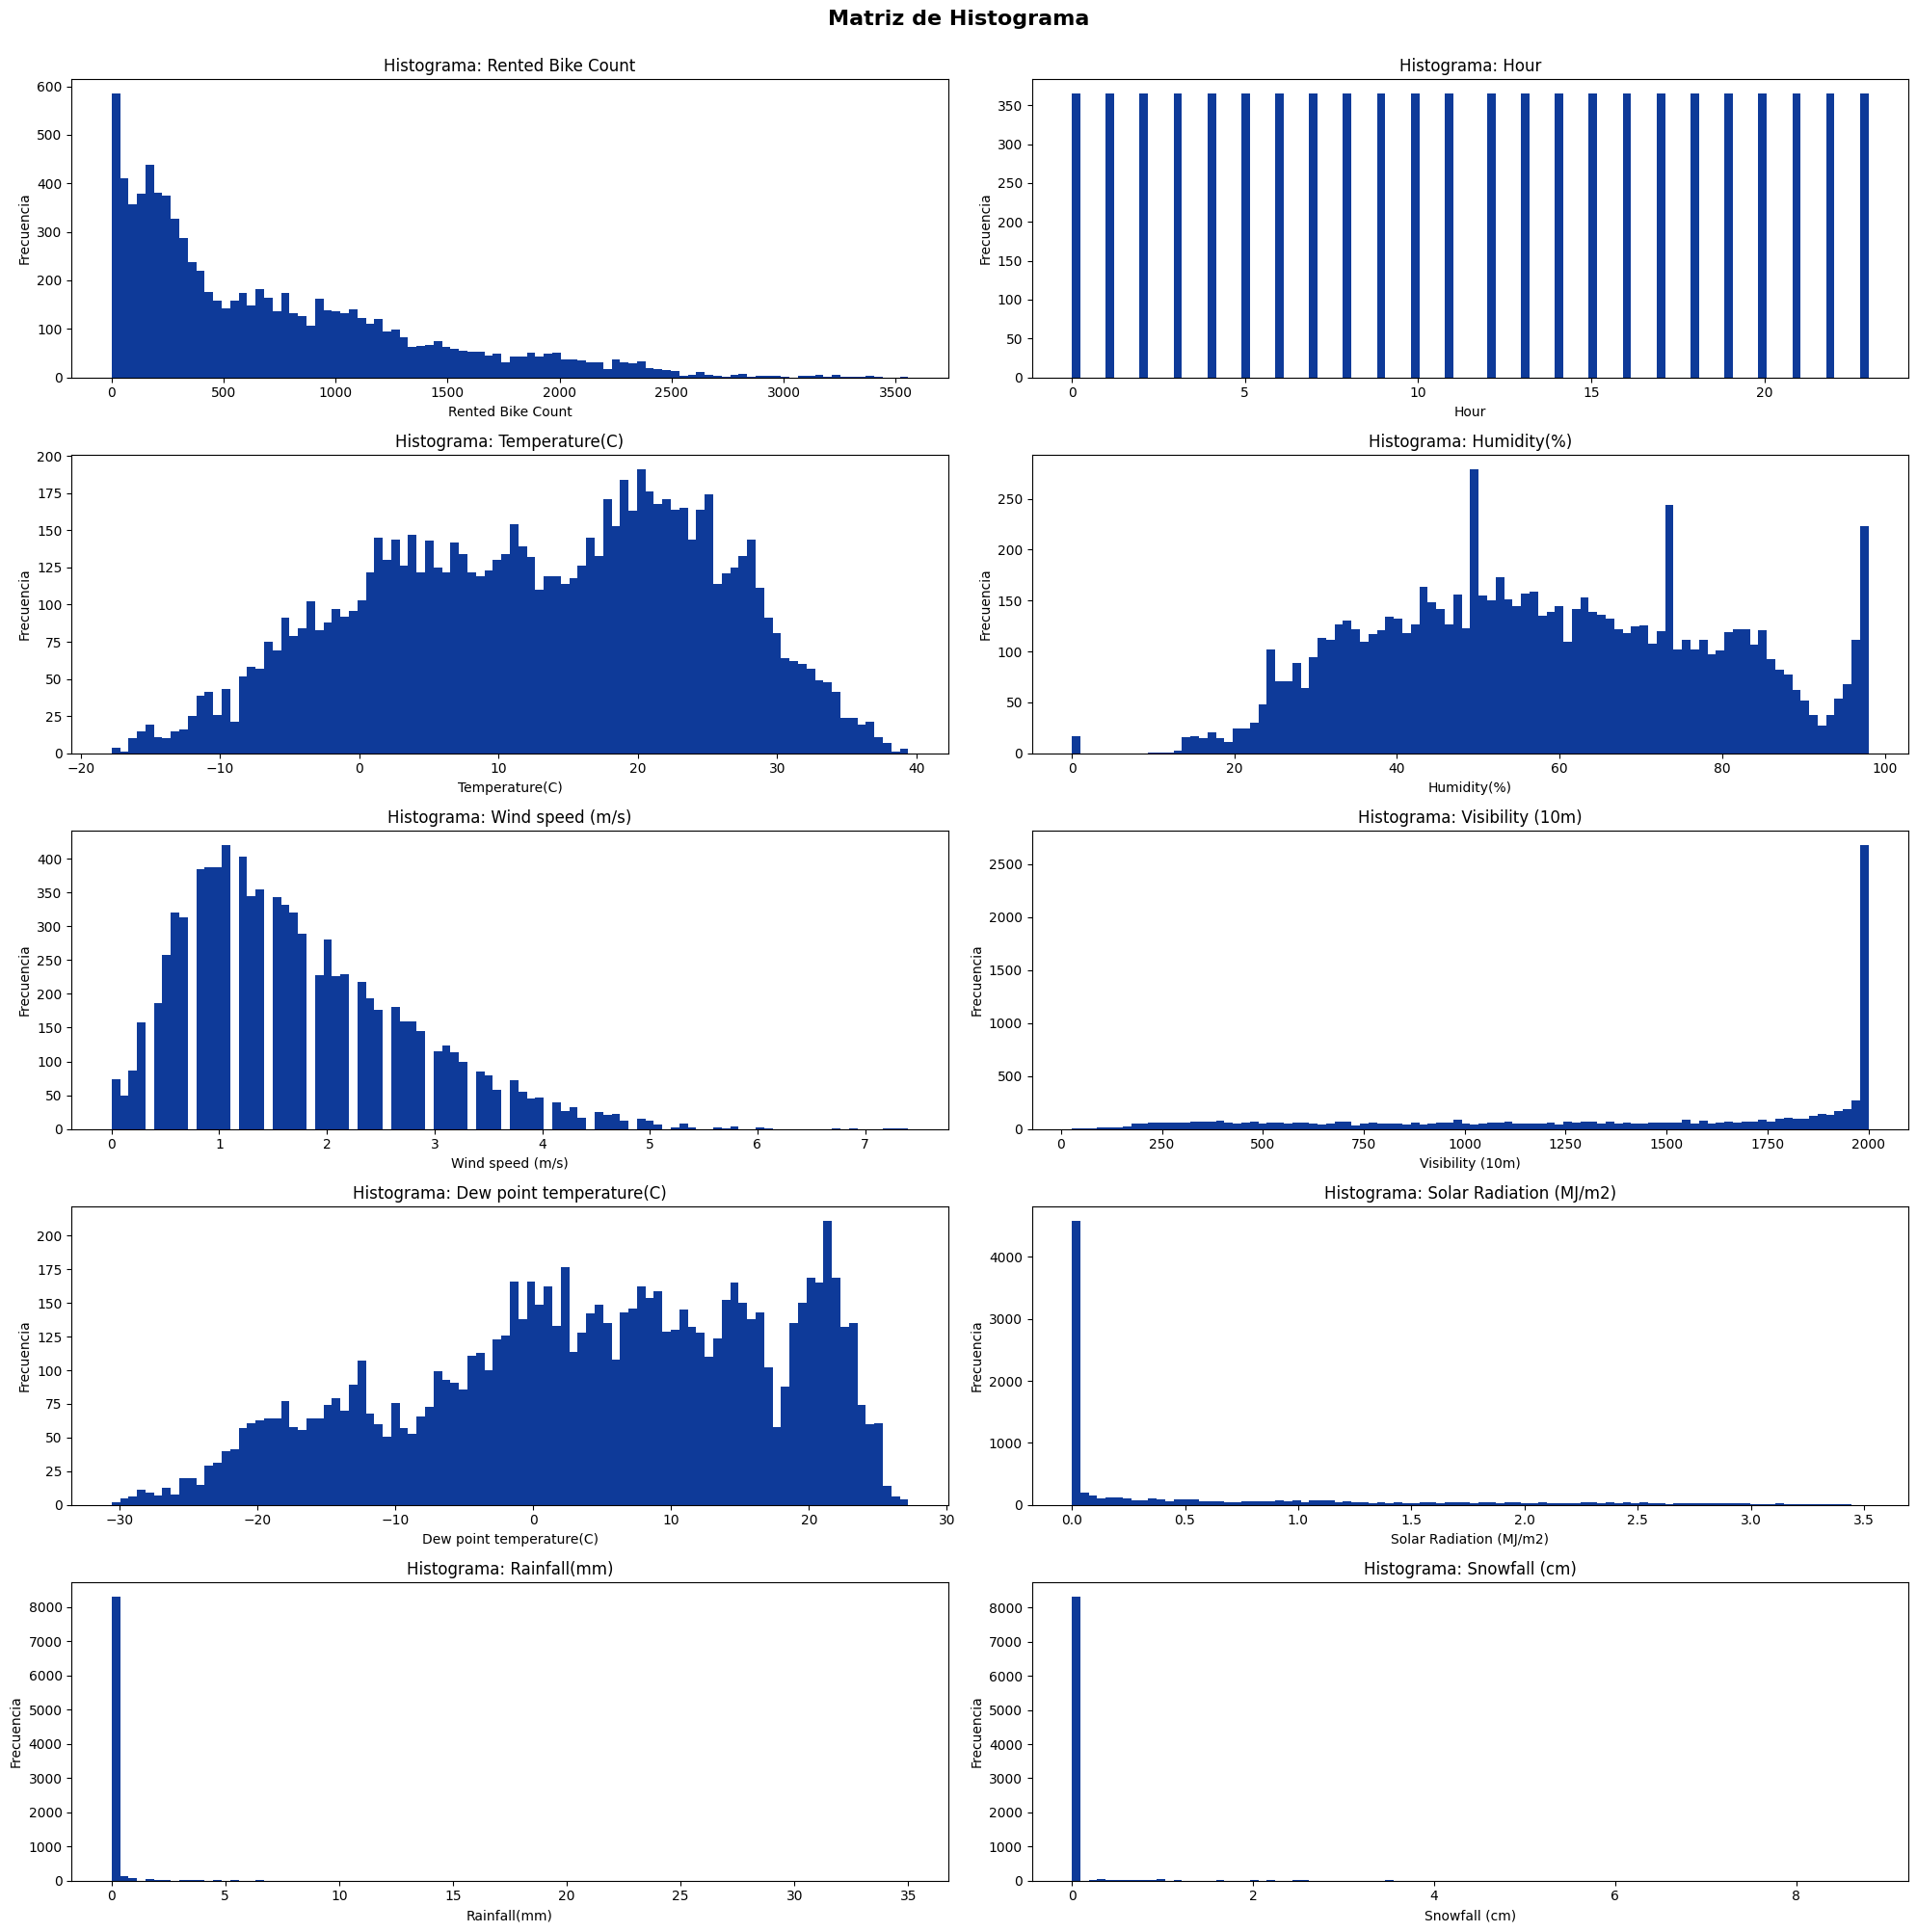

In [34]:
matriz_graficas(df=df2,r=5,c=2, y="Rented Bike Count",tipo="histograma", titulo="Histograma")

Matriz de Violin

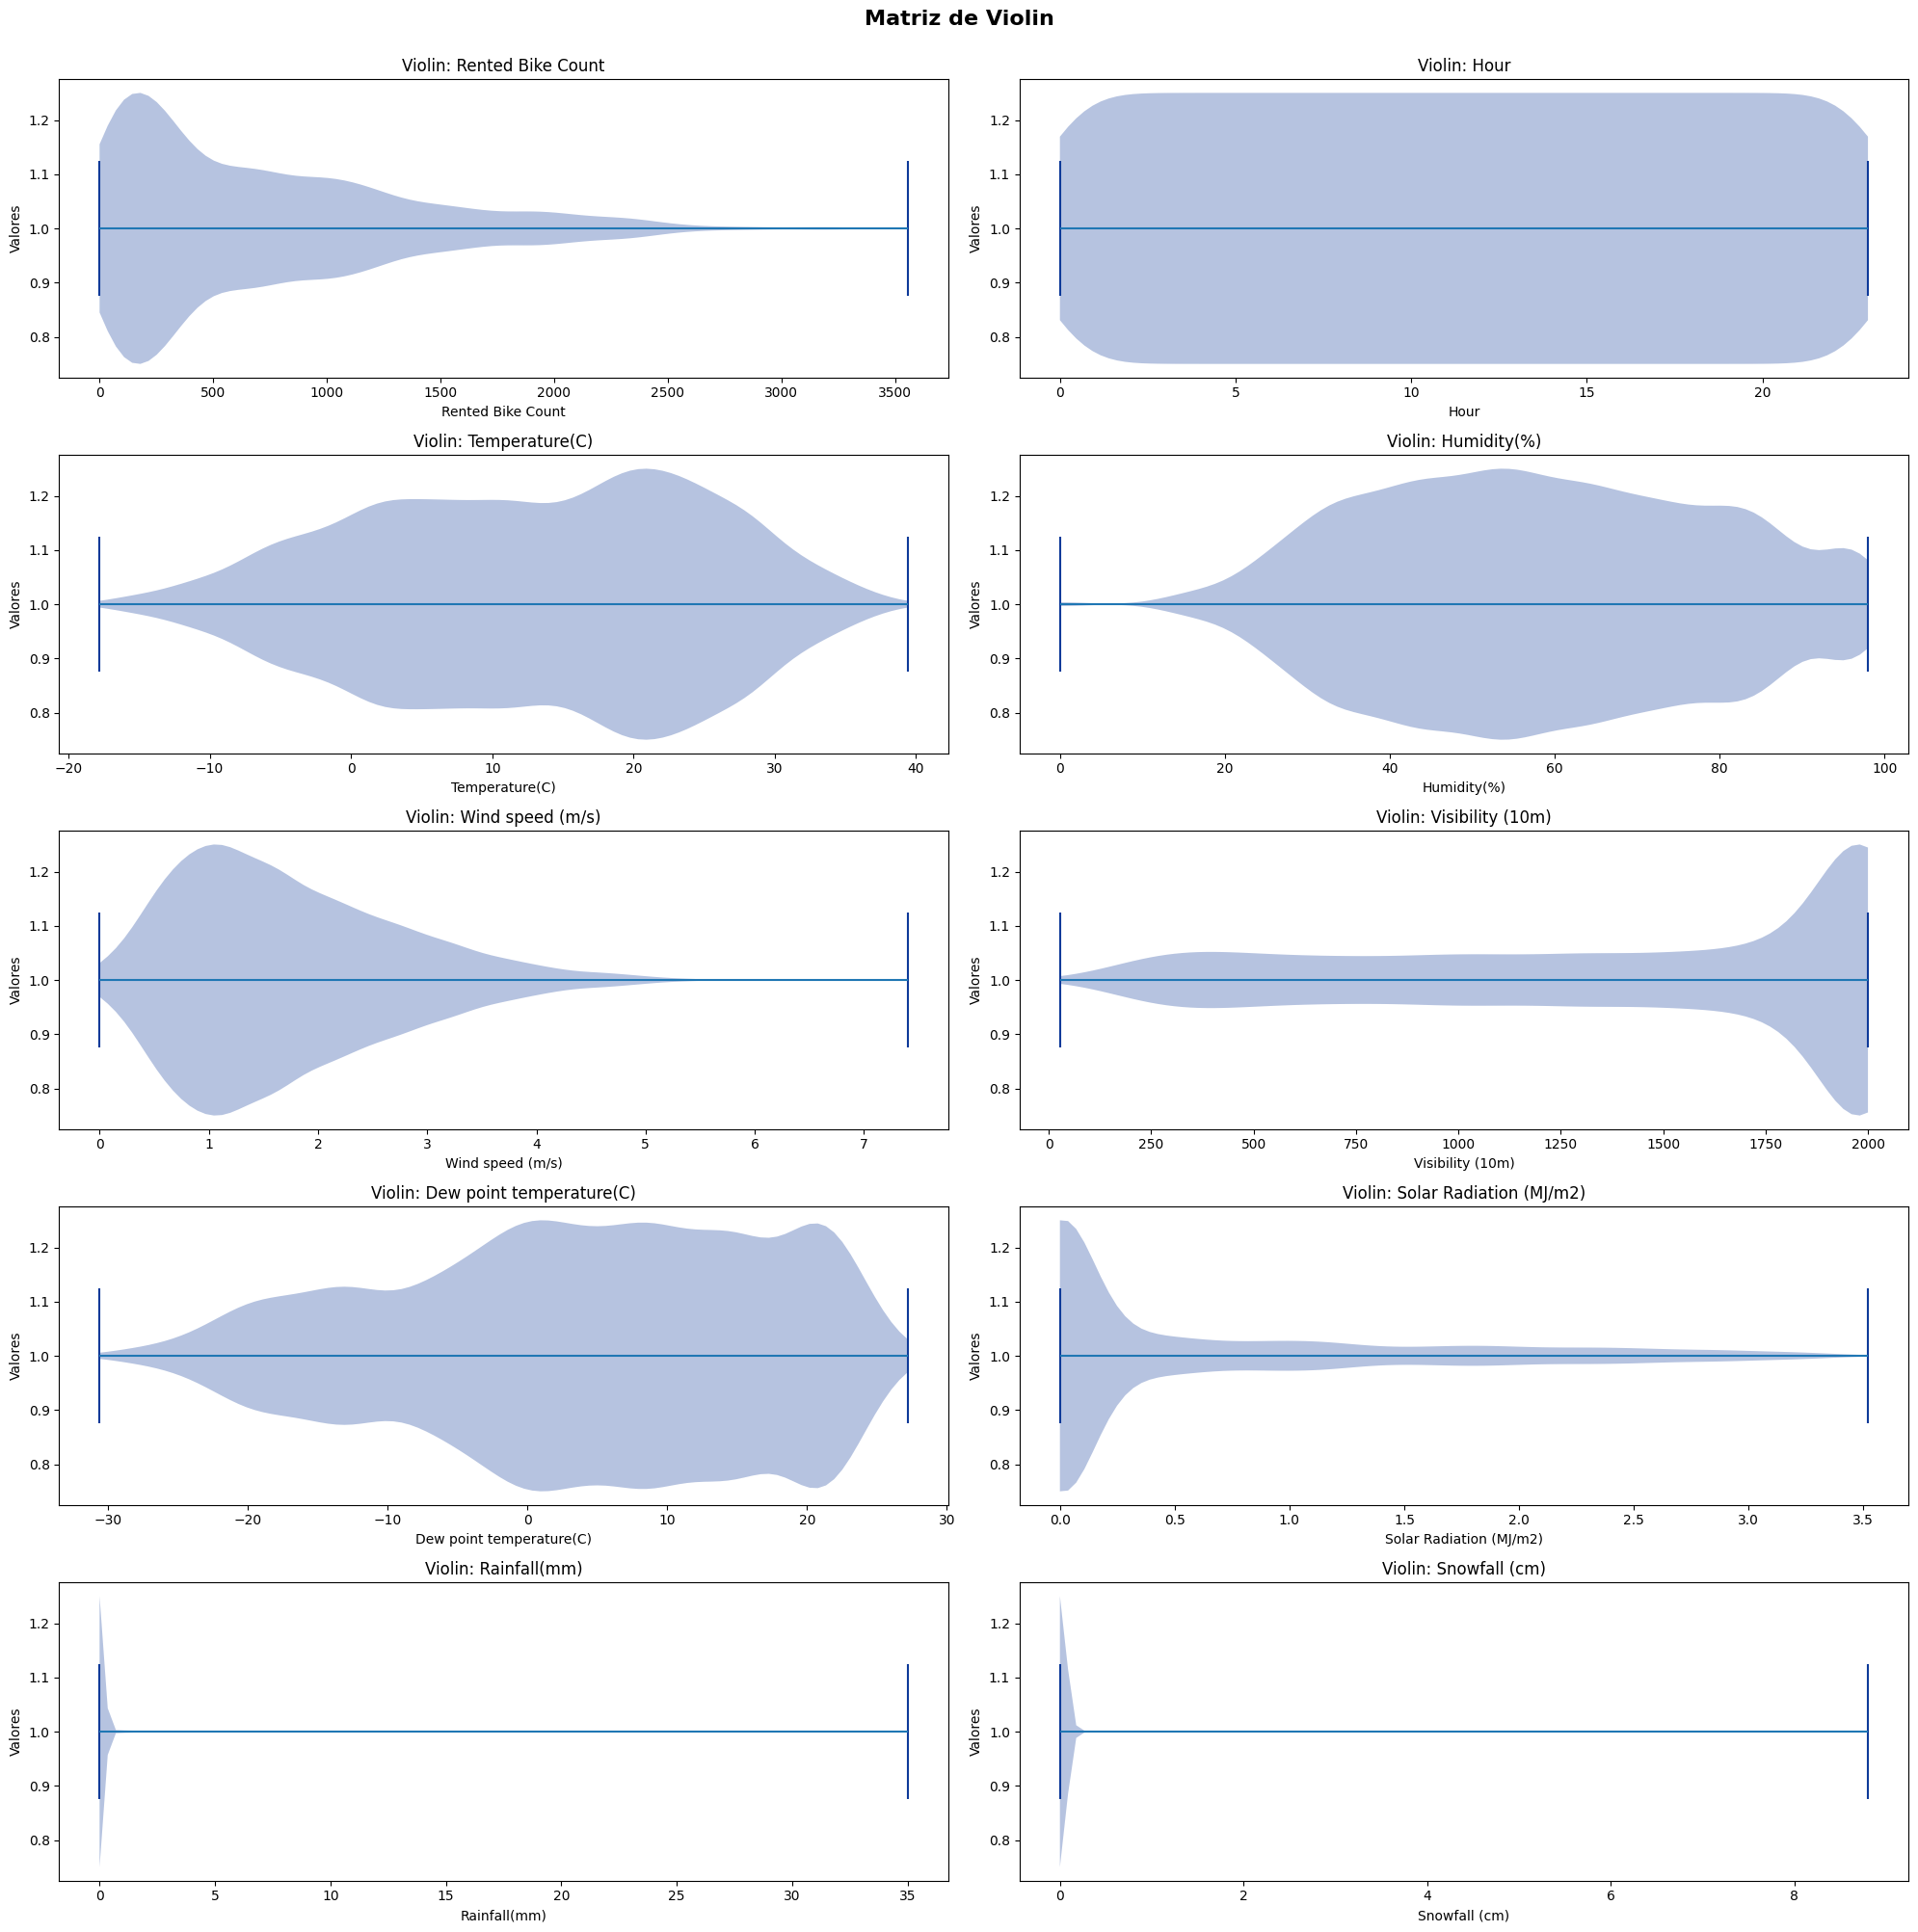

In [35]:
matriz_graficas(df=df2,r=5,c=2, y="Rented Bike Count",tipo="violin", titulo="Violin")

Matriz de Diagramas de Caja (numericas)

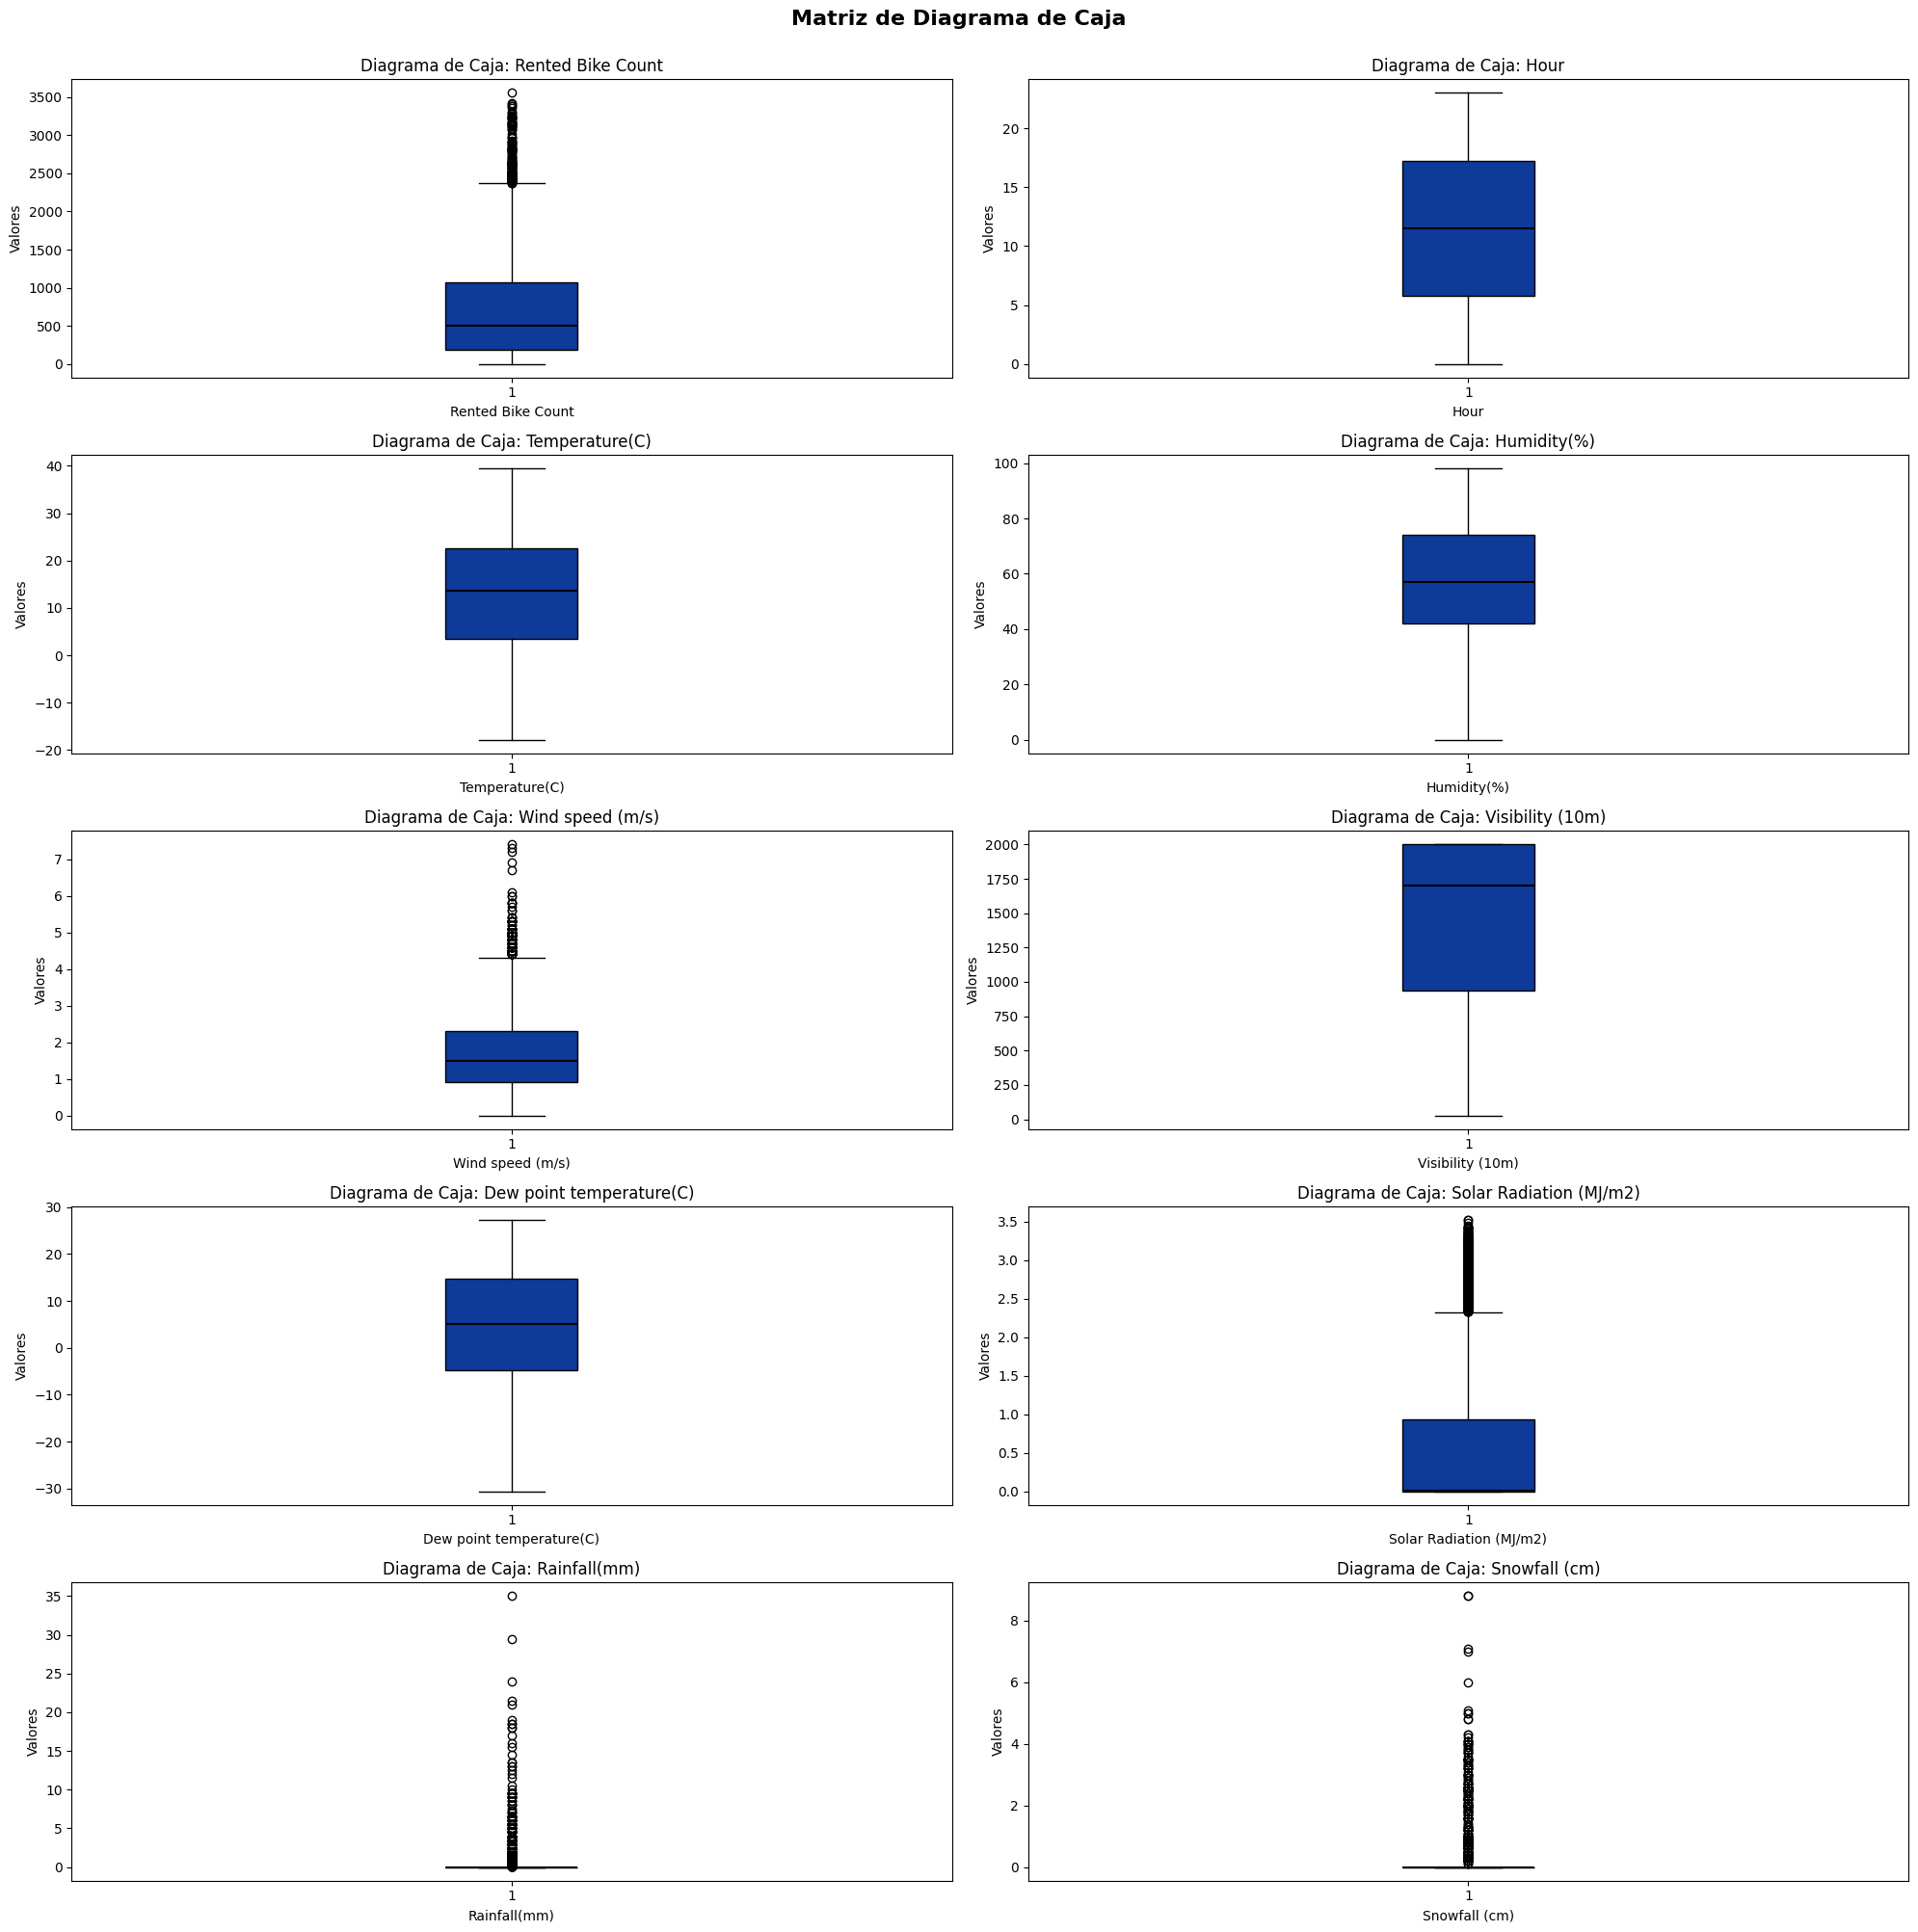

In [36]:
matriz_graficas(df=df2,r=5,c=2, y="Rented Bike Count",tipo="caja", titulo="Diagrama de Caja")

Diagrama de Cajas Seasons (categoricas)

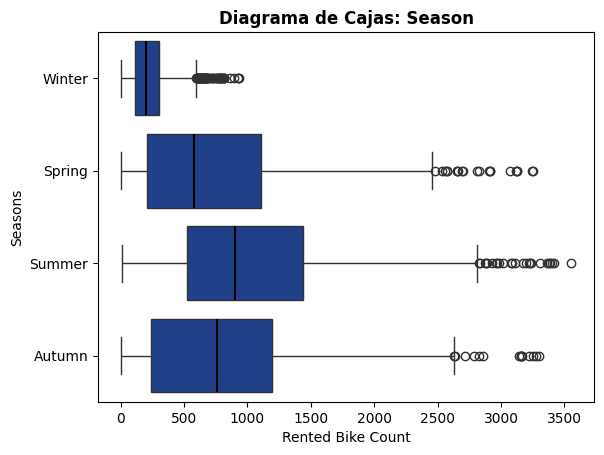

In [37]:
box = sns.boxplot(data=df, y="Seasons", x="Rented Bike Count", orient="h" , color="#0e3a99",medianprops=dict(color="black", linewidth=1.5))
kwargs = { "weight": "bold", "fontsize": "15"}
box.set_title("Diagrama de Cajas: Season", weight="bold");

Diagrama de Cajas Holidays (categoricas)

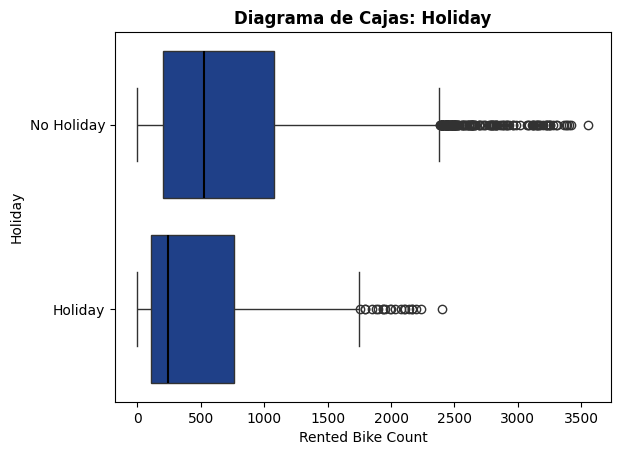

In [38]:
box = sns.boxplot(data=df, y="Holiday", x="Rented Bike Count", orient="h", color="#0e3a99",medianprops=dict(color="black", linewidth=1.5))
kwargs = { "weight": "bold", "fontsize": "15"}
box.set_title("Diagrama de Cajas: Holiday", weight="bold");

Matriz de Regresion Lineal

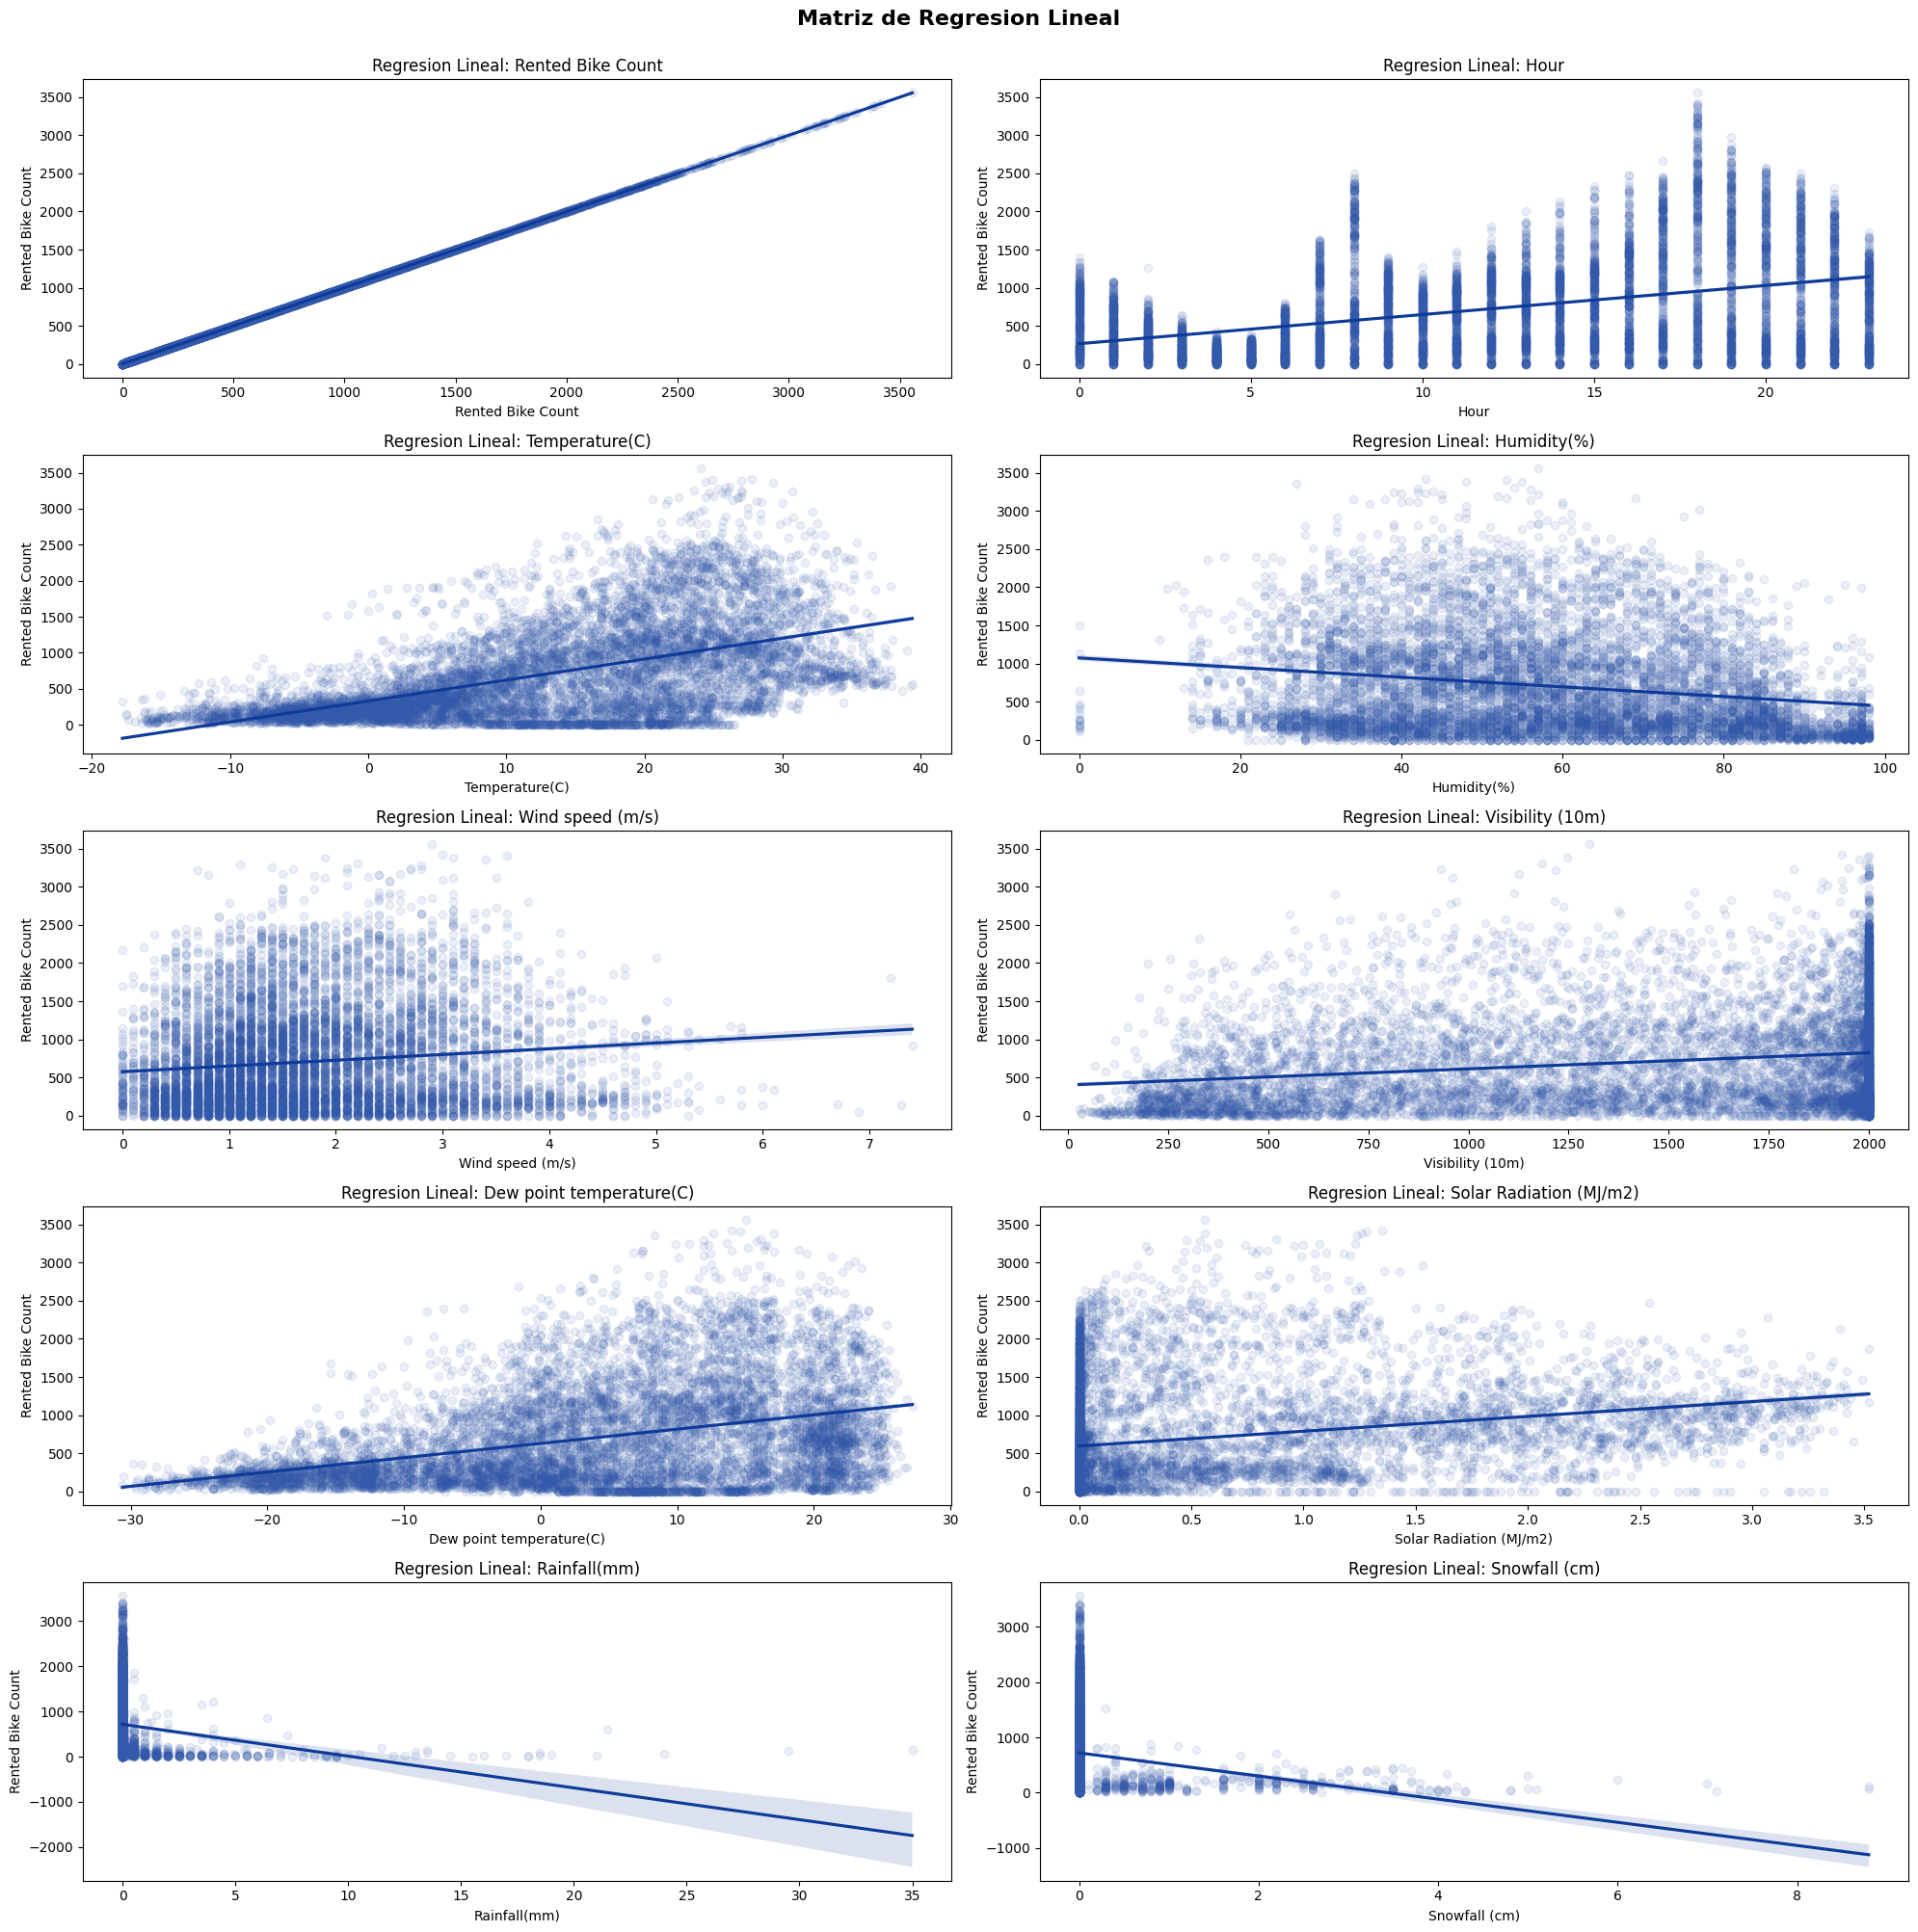

In [39]:
matriz_graficas(df=df2,r=5,c=2, y="Rented Bike Count",tipo="reg", titulo="Regresion Lineal")

Matriz de Analisis de Comportamiento de Distribucion de Variables Continuas y Analisis Bivariado

In [40]:
import statsmodels.api as sm

# colores
palette= ["#022673"]
palette_grad = ["#031438","#0b2254","#022673","#3359ab","#0e3a99", "#022673","#0b2254","#031438"]

# Agregar el hue para poder cambiarle el color mapa
df2["color"]=1


In [ ]:
# Grafica Pairplot
ax = sns.pairplot(df2, palette=palette,hue="color")
ax.figure.subplots_adjust(top=0.95)
ax.figure.suptitle("Matriz de Análisis de Comportamiento y Bivariado", fontsize = 25, weight = "bold")

Matriz de Correlación entre las variables explicativas y con la variable de respuesta.

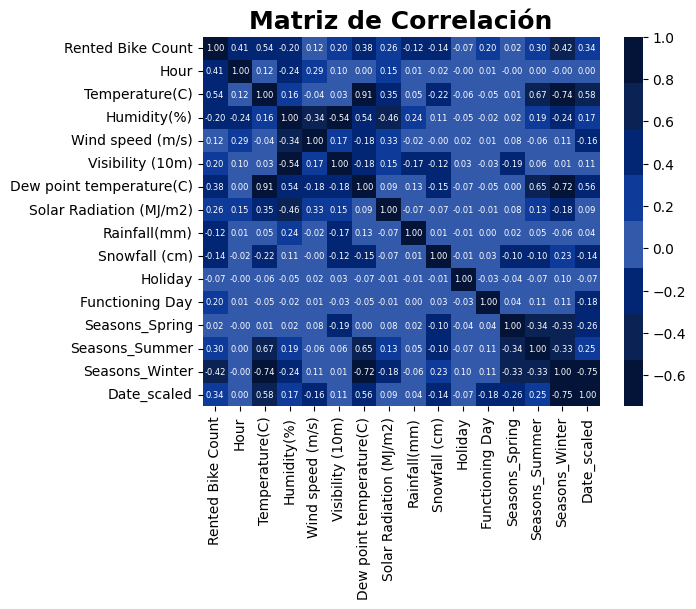

In [18]:
# Matriz de Correlación
corr = data.corr()
fig = sns.heatmap(corr, cmap=palette_grad, annot=True, fmt=".2f",annot_kws={"size": 6})
fig.set_title("Matriz de Correlación", fontdict={"color": "black", "weight": "bold", "fontsize": "18"})

Exploración bivariada de correalación entre cada varaible explicativa y la variable de respuesta

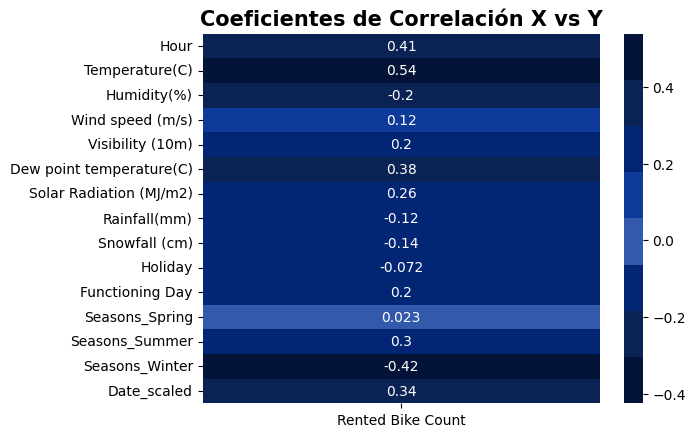

In [19]:
# Correalacion entre variables de respuesta y varaibles explicativas
corrw = data.drop(["Rented Bike Count"], axis=1).corrwith(data["Rented Bike Count"])
fig = sns.heatmap(pd.DataFrame(corrw), cmap=palette_grad, annot=True, xticklabels=["Rented Bike Count"])
fig.set_title("Coeficientes de Correlación X vs Y", fontdict={"color": "black", "weight": "bold", "fontsize": "15"})

Análisis Exploratorio Multivariado (x=Temperature, y=Hour, z=Rented Bike Count)

In [20]:
import plotly.express as px
fig = px.scatter_3d(df, x=df["Temperature(C)"], y=df["Hour"], z=df["Rented Bike Count"], size="Rented Bike Count", opacity=1)
fig.update_layout(title="Análisis Exploratorio Multivariado")
fig.show()

### Tarea 4 - Modelamiento

MODELOS CON DATOS ORIGINALES

Separar los datos:

In [126]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características y variable objetivo
X = data.drop(columns=['Rented Bike Count'])
Y = data[['Rented Bike Count']]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Implementación:

Modelos de regresión lineal

In [127]:
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir los modelos
models = {
    "Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Bayesian Ridge": BayesianRidge(),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}
trained_models = {}
for name, model in models.items():
       
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir con el modelo entrenado
    y_pred = model.predict(X_test)

    trained_models[name] = model

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir reporte
    print(f"Modelo: {name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 30)


Modelo: Lineal
Mean Squared Error (MSE): 193984.3467
Root Mean Squared Error (RMSE): 440.4365
R^2 Score: 0.5344
------------------------------
Modelo: Ridge
Mean Squared Error (MSE): 193863.2305
Root Mean Squared Error (RMSE): 440.2990
R^2 Score: 0.5347
------------------------------
Modelo: Bayesian Ridge
Mean Squared Error (MSE): 193827.6364
Root Mean Squared Error (RMSE): 440.2586
R^2 Score: 0.5348
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.461e+06, tolerance: 2.914e+05



Modelo: Lasso
Mean Squared Error (MSE): 193832.3364
Root Mean Squared Error (RMSE): 440.2639
R^2 Score: 0.5348
------------------------------
Modelo: ElasticNet
Mean Squared Error (MSE): 203125.6902
Root Mean Squared Error (RMSE): 450.6947
R^2 Score: 0.5125
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.185e+06, tolerance: 2.914e+05



Más modelos

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Definir los modelos
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "K-Neighbors": KNeighborsRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "MLP Regressor": MLPRegressor(),
}

trained_models = {}
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir con el modelo entrenado
    y_pred = model.predict(X_test)

    trained_models[name] = model

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir reporte
    print(f"Modelo: {name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 30)


Modelo: Decision Tree
Mean Squared Error (MSE): 97486.0828
Root Mean Squared Error (RMSE): 312.2276
R^2 Score: 0.7660
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: Random Forest
Mean Squared Error (MSE): 52397.3634
Root Mean Squared Error (RMSE): 228.9047
R^2 Score: 0.8742
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: Gradient Boosting
Mean Squared Error (MSE): 68264.8951
Root Mean Squared Error (RMSE): 261.2755
R^2 Score: 0.8362
------------------------------
Modelo: XGBoost
Mean Squared Error (MSE): 47362.3683
Root Mean Squared Error (RMSE): 217.6290
R^2 Score: 0.8863
------------------------------
Modelo: K-Neighbors
Mean Squared Error (MSE): 194493.5213
Root Mean Squared Error (RMSE): 441.0142
R^2 Score: 0.5332
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: Extra Trees
Mean Squared Error (MSE): 47518.3980
Root Mean Squared Error (RMSE): 217.9872
R^2 Score: 0.8860
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: AdaBoost
Mean Squared Error (MSE): 154880.4430
Root Mean Squared Error (RMSE): 393.5485
R^2 Score: 0.6283
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: MLP Regressor
Mean Squared Error (MSE): 172615.3688
Root Mean Squared Error (RMSE): 415.4701
R^2 Score: 0.5857
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



#### Ingeniería de características:

Datos1: Se eliminan las características "Seasons_Spring", "Holiday", "Dew point temperature(C), "Seasons_Winter"

In [129]:
data_1 = data.copy()

In [130]:
#Se eliminan las características "Seasons_Spring" y "Holiday" por la baja (<0.1) correlación con la variable objetivo
data_1 = data_1.drop(columns = ["Seasons_Spring", "Holiday"])

# Se elimina la caracteríatica "Dew point temperature(C)" por multicolinealidad con "Temperature(C)"
data_1 = data_1.drop(columns = "Dew point temperature(C)")

# Se elimina la caracteríatica "Seasons_Winter" por multicolinealidad con "Temperature(C)"
data_1 = data_1.drop(columns = "Seasons_Winter")

#### MODELOS DESPUÉS DE SELECCIÓN DE VARIABLES

In [133]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características y variable objetivo
X = data_1.drop(columns=['Rented Bike Count'])
Y = data_1[['Rented Bike Count']]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir los modelos
models = {
    "Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Bayesian Ridge": BayesianRidge(),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}
trained_models = {}
for name, model in models.items():
       
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir con el modelo entrenado
    y_pred = model.predict(X_test)

    trained_models[name] = model

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir reporte
    print(f"Modelo: {name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 30)


Modelo: Lineal
Mean Squared Error (MSE): 198527.7824
Root Mean Squared Error (RMSE): 445.5646
R^2 Score: 0.5235
------------------------------
Modelo: Ridge
Mean Squared Error (MSE): 198507.2866
Root Mean Squared Error (RMSE): 445.5416
R^2 Score: 0.5236
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: Bayesian Ridge
Mean Squared Error (MSE): 198486.0656
Root Mean Squared Error (RMSE): 445.5178
R^2 Score: 0.5236
------------------------------
Modelo: Lasso
Mean Squared Error (MSE): 198506.8456
Root Mean Squared Error (RMSE): 445.5411
R^2 Score: 0.5236
------------------------------
Modelo: ElasticNet
Mean Squared Error (MSE): 207077.4519
Root Mean Squared Error (RMSE): 455.0576
R^2 Score: 0.5030
------------------------------


Se ve que los modelos lineales no se ajustan adecuadamente a los datos. El mejor (Ridge) tiene un R^2 de 0.5236, es decir que es casi igual a un modelo que predice aleatoriamente, y con un error de 445.5178 bicicletas alquiladas al día. 

In [135]:
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Definir los modelos
models = {
    "Bayesian Ridge": BayesianRidge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "K-Neighbors": KNeighborsRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "MLP Regressor": MLPRegressor(),
}

trained_models = {}
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir con el modelo entrenado
    y_pred = model.predict(X_test)

    trained_models[name] = model

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir reporte
    print(f"Modelo: {name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 30)


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: Bayesian Ridge
Mean Squared Error (MSE): 198486.0656
Root Mean Squared Error (RMSE): 445.5178
R^2 Score: 0.5236
------------------------------
Modelo: Decision Tree
Mean Squared Error (MSE): 104894.0097
Root Mean Squared Error (RMSE): 323.8734
R^2 Score: 0.7482
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: Random Forest
Mean Squared Error (MSE): 51089.5826
Root Mean Squared Error (RMSE): 226.0300
R^2 Score: 0.8774
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: Gradient Boosting
Mean Squared Error (MSE): 68481.3119
Root Mean Squared Error (RMSE): 261.6893
R^2 Score: 0.8356
------------------------------
Modelo: XGBoost
Mean Squared Error (MSE): 46198.7536
Root Mean Squared Error (RMSE): 214.9390
R^2 Score: 0.8891
------------------------------
Modelo: K-Neighbors
Mean Squared Error (MSE): 197958.1961
Root Mean Squared Error (RMSE): 444.9249
R^2 Score: 0.5249
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: Extra Trees
Mean Squared Error (MSE): 50304.2947
Root Mean Squared Error (RMSE): 224.2862
R^2 Score: 0.8793
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: AdaBoost
Mean Squared Error (MSE): 154093.8858
Root Mean Squared Error (RMSE): 392.5479
R^2 Score: 0.6302
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: MLP Regressor
Mean Squared Error (MSE): 184690.0012
Root Mean Squared Error (RMSE): 429.7557
R^2 Score: 0.5567
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



El mejor modelo fue XGBoost, con un R^2 de 0.8891 (mucho más alto que el de los modelos lineales) y con un error promedio de 214.9390 bicicletas rentadas al día.

A continuación, se intentará mejorar los resultados solo de los modelos no lineales.

Datos2: Se eliminan las características "Seasons_Spring", "Holiday", "Dew point temperature(C), "Date_scaled"

In [137]:
data_2 = data.copy()

#Se eliminan las características "Seasons_Spring" y "Holiday" por la baja (<0.1) correlación con la variable objetivo
data_2 = data_2.drop(columns = ["Seasons_Spring", "Holiday"])

# Se elimina la caracteríatica "Dew point temperature(C)" por multicolinealidad con "Temperature(C)"
data_2 = data_2.drop(columns = "Dew point temperature(C)")

# Se elimina la caracteríatica "Date_scaled" por multicolinealidad con "Seasons_Winter"
data_2 = data_2.drop(columns = "Date_scaled")

In [138]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características y variable objetivo
X = data_2.drop(columns=['Rented Bike Count'])
Y = data_2[['Rented Bike Count']]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [139]:
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Definir los modelos
models = {
    "Bayesian Ridge": BayesianRidge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "K-Neighbors": KNeighborsRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "MLP Regressor": MLPRegressor(),
}

trained_models = {}
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir con el modelo entrenado
    y_pred = model.predict(X_test)

    trained_models[name] = model

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir reporte
    print(f"Modelo: {name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 30)


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: Bayesian Ridge
Mean Squared Error (MSE): 195619.9180
Root Mean Squared Error (RMSE): 442.2894
R^2 Score: 0.5305
------------------------------
Modelo: Decision Tree
Mean Squared Error (MSE): 112598.3613
Root Mean Squared Error (RMSE): 335.5568
R^2 Score: 0.7298
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: Random Forest
Mean Squared Error (MSE): 61602.3064
Root Mean Squared Error (RMSE): 248.1981
R^2 Score: 0.8521
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: Gradient Boosting
Mean Squared Error (MSE): 75661.6194
Root Mean Squared Error (RMSE): 275.0666
R^2 Score: 0.8184
------------------------------
Modelo: XGBoost
Mean Squared Error (MSE): 63547.5876
Root Mean Squared Error (RMSE): 252.0865
R^2 Score: 0.8475
------------------------------
Modelo: K-Neighbors
Mean Squared Error (MSE): 197673.7803
Root Mean Squared Error (RMSE): 444.6052
R^2 Score: 0.5256
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Modelo: Extra Trees
Mean Squared Error (MSE): 57923.2050
Root Mean Squared Error (RMSE): 240.6724
R^2 Score: 0.8610
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: AdaBoost
Mean Squared Error (MSE): 196406.8463
Root Mean Squared Error (RMSE): 443.1781
R^2 Score: 0.5286
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Modelo: MLP Regressor
Mean Squared Error (MSE): 183217.4421
Root Mean Squared Error (RMSE): 428.0391
R^2 Score: 0.5603
------------------------------


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Los resultados con la segunda selección de variables (Datos2) fueron peores que los de la primera (Datos1).

#### Optimización de hiperparámetros

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir los modelos y sus hiperparámetros
param_grids = {
    "Bayesian Ridge": {
        'alpha_1': [1e-6, 1e-5, 1e-4],
        'alpha_2': [1e-6, 1e-5, 1e-4]
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    },
    "K-Neighbors": {
        'n_neighbors': [3, 5, 7, 10]
    },
    "Extra Trees": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "AdaBoost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    },
    "MLP Regressor": {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive']
    }
}

# Definir los modelos
models = {
    "Bayesian Ridge": BayesianRidge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "K-Neighbors": KNeighborsRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "MLP Regressor": MLPRegressor(),
}

# Variable para guardar los modelos entrenados
best_models = {}
best_params = {}

for name, model in models.items():
    print(f"Entrenando modelo: {name}")
    
    # Crear el objeto GridSearchCV
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Entrenar el modelo
    grid_search.fit(X_train, y_train)
    
    # Obtener el mejor modelo
    best_model = grid_search.best_estimator_
    
    # Guardar el mejor modelo y los mejores parámetros
    best_models[name] = best_model
    best_params[name] = grid_search.best_params_
    
    # Predecir con el mejor modelo
    y_pred = best_model.predict(X_test)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir resultados
    print(f"Mejores Hiperparámetros para {name}: {best_params[name]}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 30)


Entrenando modelo: Bayesian Ridge


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mejores Hiperparámetros para Bayesian Ridge: {'alpha_1': 0.0001, 'alpha_2': 0.0001}
Mean Squared Error (MSE): 198486.0656
Root Mean Squared Error (RMSE): 445.5178
R^2 Score: 0.5236
------------------------------
Entrenando modelo: Decision Tree
Mejores Hiperparámetros para Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Mean Squared Error (MSE): 78366.5935
Root Mean Squared Error (RMSE): 279.9403
R^2 Score: 0.8119
------------------------------
Entrenando modelo: Random Forest


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Mejores Hiperparámetros para Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 51817.9932
Root Mean Squared Error (RMSE): 227.6357
R^2 Score: 0.8756
------------------------------
Entrenando modelo: Gradient Boosting


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mejores Hiperparámetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error (MSE): 44861.8328
Root Mean Squared Error (RMSE): 211.8061
R^2 Score: 0.8923
------------------------------
Entrenando modelo: XGBoost
Mejores Hiperparámetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error (MSE): 46489.3316
Root Mean Squared Error (RMSE): 215.6138
R^2 Score: 0.8884
------------------------------
Entrenando modelo: K-Neighbors
Mejores Hiperparámetros para K-Neighbors: {'n_neighbors': 7}
Mean Squared Error (MSE): 191720.5291
Root Mean Squared Error (RMSE): 437.8590
R^2 Score: 0.5398
------------------------------
Entrenando modelo: Extra Trees


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Mejores Hiperparámetros para Extra Trees: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error (MSE): 50573.9074
Root Mean Squared Error (RMSE): 224.8864
R^2 Score: 0.8786
------------------------------
Entrenando modelo: AdaBoost


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mejores Hiperparámetros para AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}
Mean Squared Error (MSE): 131001.2369
Root Mean Squared Error (RMSE): 361.9409
R^2 Score: 0.6856
------------------------------
Entrenando modelo: MLP Regressor


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


6 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\danie\AppData

Mejores Hiperparámetros para MLP Regressor: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Mean Squared Error (MSE): 157140.4764
Root Mean Squared Error (RMSE): 396.4095
R^2 Score: 0.6228
------------------------------


Después de optimizar los hiperparámetros, el modelo Gradient Boosting superó los resultados de XGBoost, con un R^2 de 0.8923 y un error promedio de 211.8061 bicicletas. Mientras que XGBoost empeoró con respecto a sus resultados con los hiperparámetros por defeto. \
\
**Mejor modelo:** Gradient Boosting

### Tarea 5 - Diseño y Desarrollo del Tablero

In [ ]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import Lasso

# Suposiciones financieras
precio_regular = 9000  # Precio por hora en días regulares
precio_festivo = 10000  # Precio por hora en días festivos
costo_mantenimiento_diario = 3000  # Costo de mantenimiento por bicicleta por día
costo_almacenamiento = 500  # Costo de almacenamiento por bicicleta no utilizada

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Definir el diseño del tablero
app.layout = html.Div([
    html.H1("Predicción de Rentas de Bicicletas", style={'textAlign': 'center', 'color': '#333'}),
    
    html.Div([
        html.Label('Temporada:'),
        dcc.Dropdown(
            id='season-dropdown',
            options=[
                {'label': 'Primavera', 'value': 'Spring'},
                {'label': 'Verano', 'value': 'Summer'},
                {'label': 'Otoño', 'value': 'Autumn'},
                {'label': 'Invierno', 'value': 'Winter'}
            ],
            value='Primavera',
            style={'marginBottom': '10px'}
        ),
        html.Label('¿Es un día festivo?:'),
        dcc.RadioItems(
            id='holiday-radio',
            options=[
                {'label': 'Sí', 'value': 1},
                {'label': 'No', 'value': 0}
            ],
            value=0,
            style={'marginBottom': '10px'}
        ),
        html.Label('Temperatura (C):'),
        dcc.Input(id='temp-input', type='number', value=20, style={'marginBottom': '10px'}),
        html.Label('Humedad (%):'),
        dcc.Input(id='humidity-input', type='number', value=50, style={'marginBottom': '10px'}),
        html.Label('Velocidad del viento (m/s):'),
        dcc.Input(id='wind-input', type='number', value=5, style={'marginBottom': '10px'}),
        html.Label('Visibilidad (10m):'),
        dcc.Input(id='visibility-input', type='number', value=1000, style={'marginBottom': '10px'}),
    ], style={'padding': '20px', 'backgroundColor': '#f9f9f9', 'borderRadius': '10px'}),
    
    html.Div(id='prediction-output'),

    html.H2("Análisis Financiero", style={'textAlign': 'center', 'color': '#333', 'marginTop': '50px'}),
    
    html.Div([
        html.Label('Bicicletas disponibles:'),
        dcc.Input(id='bikes-available-input', type='number', value=100, style={'marginBottom': '10px'}),
        html.Div(id='financial-analysis-output'),
        dcc.Graph(id='bar-chart'),
        dcc.Graph(id='pie-chart')
    ], style={'padding': '20px', 'backgroundColor': '#f9f9f9', 'borderRadius': '10px'}),
], style={'backgroundColor': 'white', 'padding': '50px'})

# Callback para realizar predicciones, análisis financiero y graficar
@app.callback(
    [Output('prediction-output', 'children'),
     Output('financial-analysis-output', 'children'),
     Output('bar-chart', 'figure'),
     Output('pie-chart', 'figure')],
    [Input('season-dropdown', 'value'),
     Input('holiday-radio', 'value'),
     Input('temp-input', 'value'),
     Input('humidity-input', 'value'),
     Input('wind-input', 'value'),
     Input('visibility-input', 'value'),
     Input('bikes-available-input', 'value')]
)
def update_analysis(season, holiday, temp, humidity, wind_speed, visibility, bikes_available):
    # Crear un DataFrame con las entradas del usuario para predicción
    input_data = pd.DataFrame({
        'Temperature(C)': [temp],
        'Humidity(%)': [humidity],
        'Wind speed(m/s)': [wind_speed],
        'Visibility(10m)': [visibility],
        'Holiday': [holiday],
        'Season_Spring': [1 if season == 'Spring' else 0],
        'Season_Summer': [1 if season == 'Summer' else 0],
        'Season_Autumn': [1 if season == 'Autumn' else 0],
        'Season_Winter': [1 if season == 'Winter' else 0]
    })

    # TOCA CAMBIAR ESTO DEPENDIENDO DEL MODELO
    prediction = model.predict(input_data)[0]
    rented_bikes = int(prediction)

    # Calcular ingresos
    if holiday == 1:
        ingreso_por_hora = precio_festivo
    else:
        ingreso_por_hora = precio_regular
    
    total_ingresos = rented_bikes * ingreso_por_hora

    # Calcular costos
    costo_fijo_total = bikes_available * costo_mantenimiento_diario
    bicicletas_no_alquiladas = max(bikes_available - rented_bikes, 0)
    costo_variable_total = bicicletas_no_alquiladas * costo_almacenamiento
    total_costos = costo_fijo_total + costo_variable_total

    # Salida de la predicción y análisis financiero
    prediction_output = html.Div([
        html.H5('Predicción de Renta de Bicicletas'),
        html.Label(f'Cantidad estimada de bicicletas rentadas: {rented_bikes}')
    ])

    financial_analysis_output = html.Div([
        html.Label(f'Ingresos totales estimados: ${total_ingresos:,.0f} COP'),
        html.Br(),
        html.Label(f'Costos fijos estimados: ${costo_fijo_total:,.0f} COP'),
        html.Br(),
        html.Label(f'Costos variables estimados: ${costo_variable_total:,.0f} COP'),
        html.Br(),
        html.Label(f'Costos totales estimados: ${total_costos:,.0f} COP'),
        html.Br(),
        html.Label(f'Beneficio estimado: ${total_ingresos - total_costos:,.0f} COP')
    ])

    # Gráfico de barras comparando ingresos totales vs costos totales
    bar_chart = go.Figure(data=[
        go.Bar(name='Ingresos Totales', x=['Ingresos'], y=[total_ingresos], marker_color='green'),
        go.Bar(name='Costos Totales', x=['Costos'], y=[total_costos], marker_color='red')
    ])
    bar_chart.update_layout(title='Comparativo Ingresos vs Costos Totales', barmode='group')

    # Gráfico circular (pie chart) de costos totales divididos en fijos y variables
    pie_chart = go.Figure(data=[
        go.Pie(labels=['Costos Fijos', 'Costos Variables'], values=[costo_fijo_total, costo_variable_total])
    ])
    pie_chart.update_layout(title='Distribución de Costos Fijos vs Variables')

    return prediction_output, financial_analysis_output, bar_chart, pie_chart

if __name__ == '__main__':
    app.run_server(debug=True)

